# Exploring alcohol-related content on Twitter

In [1]:
import json
import pandas as pd
from langdetect import detect
import networkx as nx

tweets = []
for line in open('twitter-@alcohol.json', 'r'):
    tweets.append(json.loads(line))

twitter_content = []
twitter_user = []

for tweet in tweets:
    try:
        if detect(tweet["content"]) == "en":
            lang = "en"
            twitter_content.append(tweet["content"])
            twitter_user.append(tweet["user"]["id"])
    except:
        lang = 'no'

In [10]:
data = pd.DataFrame()
data["content"] = twitter_content
data["user_id"] = twitter_user
data

,content,user_id
0,@CGHSFL As someone who has worked in rescuing ...,1520082323076698113
1,Rose Leslie says husband Kit Harington’s alcoh...,1494042232609026050
2,@loverocksfest @GuyB_rockshow @amongstliars @B...,547105029
3,@ssoniisshh1 What about her drinking alcohol?,3254461124
4,@LadyAtTheBarNFT @peskyfucker @yaboynancy @Ton...,1477963544721125376
...,...,...
59843,Love that #JusticeForJohhnyDepp for is trendin...,1416348636
59844,@POTUS @JoeBiden I don’t wanna feel hangovers ...,1482653807205130241
59845,"@xsauc @yoofilos Like alcohol, NFTs are garbag...",918961233830842368
59846,@isaacfloyd13 Years of alcohol abuse taking it...,167601789


remove stopwords

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize.casual import TweetTokenizer
import string

STOP_PREFIXES = ("@", "http", "&amp")

def clean_text(comment):
    comment = comment.replace("\n", " ")
    comment = comment.replace("  ", " ")
    comment = comment.lower()
    words = []

    for word in TweetTokenizer().tokenize(comment):
        if word not in list(string.punctuation) and word not in stopwords.words("english") and not word.startswith(STOP_PREFIXES):
            words.append(word)
    
    return (" ").join(words)

data["content"] = data["content"].apply(clean_text)
data

,content,user_id
0,someone worked rescuing animals 16 years ’ nev...,1520082323076698113
1,rose leslie says husband kit harington ’ alcoh...,1494042232609026050
2,hugs back atcha si eric yet home holding alcoh...,547105029
3,drinking alcohol,3254461124
4,get rare 0 alcohol oj trait,1477963544721125376
...,...,...
59843,love #justiceforjohhnydepp trending extraordin...,1416348636
59844,’ wanna feel hangovers drunk without drinking ...,1482653807205130241
59845,like alcohol nfts garbage,918961233830842368
59846,years alcohol abuse taking toll,167601789


Text(0.5, 1.0, 'Twitter')

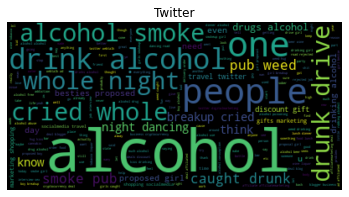

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = " ".join(data["content"].values)
word_cloud = WordCloud().generate(words)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Twitter")

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


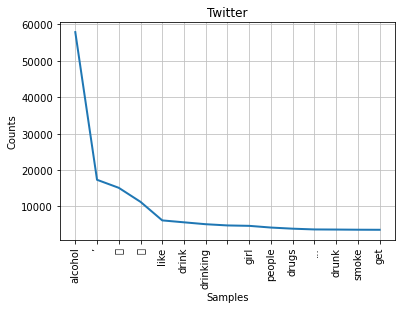

In [21]:
from nltk.probability import FreqDist

freq = FreqDist(words.split(" "))
freq.plot(15, cumulative=False, title="Twitter")
str(list(freq)[:20])
freq_words = list(freq)[:20]
freq_dic = dict(FreqDist(words.split(" ")))

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def find_positive(comment):
    return sia.polarity_scores(comment)["pos"]

def find_neutral(comment):
    return sia.polarity_scores(comment)["neu"]

def find_negative(comment):
    return sia.polarity_scores(comment)["neg"]

def find_compound(comment):
    return sia.polarity_scores(comment)["compound"]

data["Positive"] = data["content"].apply(find_positive)
data["Neutral"] = data["content"].apply(find_neutral)
data["Negative"] = data["content"].apply(find_negative)
data["Compound"] = data["content"].apply(find_compound)
data

,content,user_id,Positive,Neutral,Negative,Compound
0,someone worked rescuing animals 16 years ’ nev...,1520082323076698113,0.096,0.701,0.203,-0.4416
1,rose leslie says husband kit harington ’ alcoh...,1494042232609026050,0.000,1.000,0.000,0.0000
2,hugs back atcha si eric yet home holding alcoh...,547105029,0.211,0.789,0.000,0.4939
3,drinking alcohol,3254461124,0.000,1.000,0.000,0.0000
4,get rare 0 alcohol oj trait,1477963544721125376,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
59843,love #justiceforjohhnydepp trending extraordin...,1416348636,0.148,0.601,0.251,-0.4404
59844,’ wanna feel hangovers drunk without drinking ...,1482653807205130241,0.000,0.714,0.286,-0.3400
59845,like alcohol nfts garbage,918961233830842368,0.455,0.545,0.000,0.3612
59846,years alcohol abuse taking toll,167601789,0.000,0.488,0.512,-0.6369


In [15]:
print("The mean positive sentiment score: {}".format(data["Positive"].mean()))
print("The mean negative sentiment score: {}".format(data["Negative"].mean()))
print("The mena neutral sentiment score: {}".format(data["Neutral"].mean()))
print("The mean compound sentiment score: {}".format(data["Compound"].mean()))

The mean positive sentiment score: 0.15605544044913963
The mean negative sentiment score: 0.1304950708461453
The mena neutral sentiment score: 0.7116912177516493
The mean compound sentiment score: 0.030087874281514698


/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


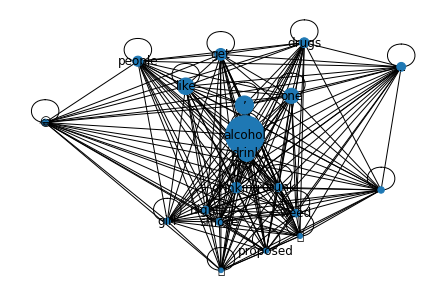

In [32]:
def word_freq(content, word1, word2):
    if word1 in content and word2 in content:
        return 1
    else:
        return 0

def word_sent(content, sentiment, word):
    if word in content:
        return sentiment
    else:
        return 0

positive_scores = {}
neutral_scorres = {}
negative_scrores = {}
compound_scores = {}

graph1 = nx.Graph()

for i in range(len(freq_words)):
    word1 = freq_words[i]

    #add sentiment scores
    positive_scores[word1] = data.apply(lambda x: word_sent(x["content"], x["Positive"], word1), axis=1).mean() * 50000
    neutral_scorres[word1] = data.apply(lambda x: word_sent(x["content"], x["Neutral"], word1), axis=1).mean() * 50000
    negative_scrores[word1] = data.apply(lambda x: word_sent(x["content"], x["Negative"], word1), axis=1).mean() * 50000
    compound_scores[word1] = data.apply(lambda x: word_sent(x["content"], x["Compound"], word1), axis=1).mean() * 50000
    
    for j in range(len(freq_words)):
        word2 = freq_words[j]

        tie = data.apply(lambda x: word_freq(x["content"], word1, word2), axis=1).sum()

        graph1.add_edge(word1, word2, weight=tie)

nx.draw(graph1, nodelist=list(positive_scores.keys()), node_size=list(positive_scores.values()), with_labels=True)

In [26]:
for key, value in positive_scores.items():
    print(value / freq_dic[key] * 1000000)

2.6882539299524013
6.554921222045026
0.5651007768302416
1.2006042478308618
43.06800485981806
49.577029680870126
24.754283369241822
10.866202520221686
10.663778007003655
34.49634177574739
37.003805995532126
33.89406296265063
27.743877131301776
21.443560941363206
62.93881172839507
30.15657101263682
135.80992633920488
38.53481956670955
22.984830495951574
38.61578539241926
